In [1]:
import numpy as np
import xarray as xr
import pandas as pd

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Initial Plotting of Multiple Plots (no loop)

In [2]:
#read .nc datasets
ds3 = xr.open_dataset('/data2/qy2216/HWRF_wind/hwrf.2021072718/nepartak11w/nc/nepartak11w.2021072718.f003.nc')
ds6 = xr.open_dataset('/data2/qy2216/HWRF_wind/hwrf.2021072718/nepartak11w/nc/nepartak11w.2021072718.f006.nc')
ds9 = xr.open_dataset('/data2/qy2216/HWRF_wind/hwrf.2021072718/nepartak11w/nc/nepartak11w.2021072718.f009.nc')

In [3]:
#read .tpc file
colspecs = [(5, 10), (18, 25), (32, 38), (56, 63), (89, 95)]
df = pd.read_fwf('/data2/qy2216/HWRF_wind/hwrf.2021072718/nepartak11w/track/NEPARTAK11W.2021072718.stats.tpc', 
                 colspecs=colspecs, header=None, skiprows=12, names=['hour', 'lon', 'lat', 'P', 'V'])
df = df[:41]

In [4]:
#find centers of storm
df['hour'] = df['hour'].astype(float)
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)

xcenter3 = df[df.hour == 3].lon.values[0]
ycenter3 = df[df.hour == 3].lat.values[0]
print(xcenter3, ycenter3)
xcenter6 = df[df.hour == 6].lon.values[0]
ycenter6 = df[df.hour == 6].lat.values[0]
print(xcenter6, ycenter6)
xcenter9 = df[df.hour == 9].lon.values[0]
ycenter9 = df[df.hour == 9].lat.values[0]
print(xcenter9, ycenter9)

141.8 38.4
141.6 38.9
141.2 39.7


In [5]:
#get data to graph
z3 = ds3.APCP_surface.isel(time=0).values
z6 = ds6.APCP_surface.isel(time=0).values
z9 = ds9.APCP_surface.isel(time=0).values

lon3 = ds3.longitude.values
lat3 = ds3.latitude.values
lon6 = ds6.longitude.values
lat6 = ds6.latitude.values
lon9 = ds9.longitude.values
lat9 = ds9.latitude.values

In [6]:
#create polar grid
ntheta_pts = 201
nr_pts = 200
rmax = 300

#FIX rmax name
r1 = np.linspace(0, rmax, nr_pts)
theta1 = np.linspace(-np.pi, np.pi, ntheta_pts)

theta2, r2 = np.meshgrid(theta1, r1)

# cartesian coordinates (in km) of the polar coordinates
polar_x2 = r2 * np.cos(theta2)
polar_y2 = r2 * np.sin(theta2)

In [7]:
# convert units to km
x31 = (ds3.longitude.values - xcenter3) * np.cos(np.deg2rad(ycenter3)) * 110.567
y31 = (ds3.latitude.values - ycenter3) * 110.567
x32, y32 = np.meshgrid(x31, y31)
x61 = (ds6.longitude.values - xcenter6) * np.cos(np.deg2rad(ycenter6)) * 110.567
y61 = (ds6.latitude.values - ycenter6) * 110.567
x62, y62 = np.meshgrid(x61, y61)
x91 = (ds9.longitude.values - xcenter9) * np.cos(np.deg2rad(ycenter9)) * 110.567
y91 = (ds9.latitude.values - ycenter9) * 110.567
x92, y92 = np.meshgrid(x91, y91)

# number of points X 2 matrix of x y
xy3 = np.stack((x32.flatten(), y32.flatten())).T
xy6 = np.stack((x62.flatten(), y62.flatten())).T
xy9 = np.stack((x92.flatten(), y92.flatten())).T

In [8]:
#interpolate onto polar grid
from scipy.interpolate import NearestNDInterpolator

interp3 = NearestNDInterpolator(xy3, z3.flatten())
Z3 = interp3(polar_x2, polar_y2)
interp6 = NearestNDInterpolator(xy6, z6.flatten())
Z6 = interp6(polar_x2, polar_y2)
interp9 = NearestNDInterpolator(xy9, z9.flatten())
Z9 = interp9(polar_x2, polar_y2)

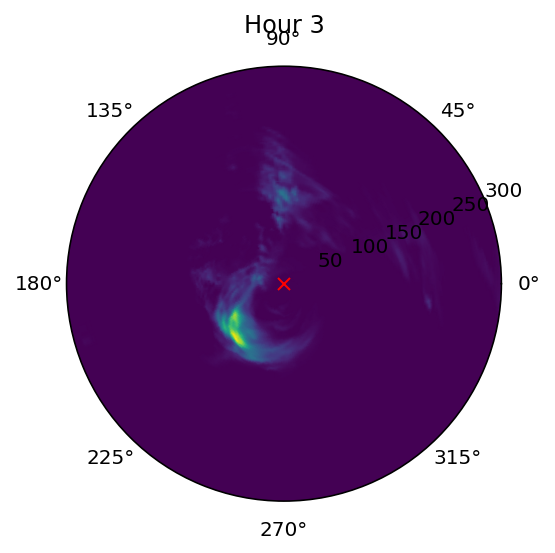

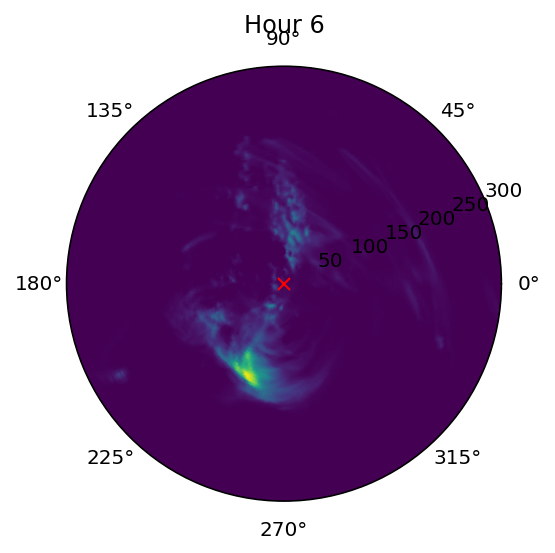

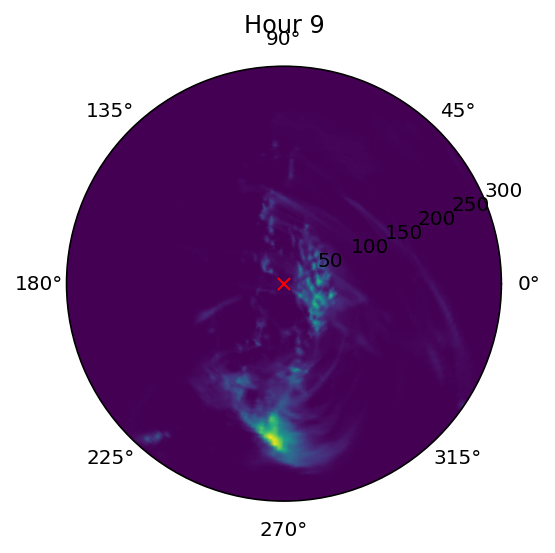

In [9]:
#plot hours 3,6,9

plt.figure()
plt.subplot(projection="polar")
plt.pcolormesh(theta1, r1, Z3, shading='gouraud')
plt.plot(0, 0, 'rx', label='center')
plt.title('Hour 3')

plt.figure()
plt.subplot(projection="polar")
plt.pcolormesh(theta1, r1, Z6, shading='gouraud')
plt.plot(0, 0, 'rx', label='center')
plt.title('Hour 6')

plt.figure()
plt.subplot(projection="polar")
plt.pcolormesh(theta1, r1, Z9, shading='gouraud')
plt.plot(0, 0, 'rx', label='center')
plt.title('Hour 9')

plt.show()

## Plotting Multiple Hours of Storm (with loop)

In [10]:
#read .tpc file
colspecs = [(5, 10), (18, 25), (32, 38), (56, 63), (89, 95)]
df = pd.read_fwf('/data2/qy2216/HWRF_wind/hwrf.2021072718/nepartak11w/track/NEPARTAK11W.2021072718.stats.tpc', 
                 colspecs=colspecs, header=None, skiprows=12, names=['hour', 'lon', 'lat', 'P', 'V'])
df = df[:41]
# they are strings, convert to float
df['hour'] = df['hour'].astype(float)
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)

In [11]:
#create polar grid
ntheta_pts = 201
nr_pts = 200
rmax = 300

#FIX rmax name
r1 = np.linspace(0, rmax, nr_pts)
theta1 = np.linspace(-np.pi, np.pi, ntheta_pts)

theta2, r2 = np.meshgrid(theta1, r1)

# cartesian coordinates (in km) of the polar coordinates
polar_x2 = r2 * np.cos(theta2)
polar_y2 = r2 * np.sin(theta2)

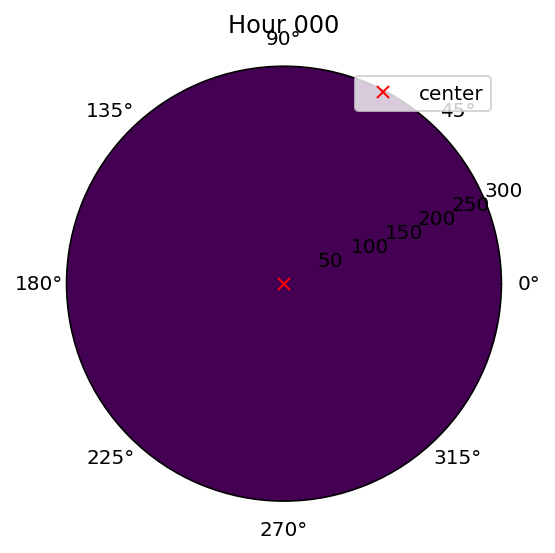

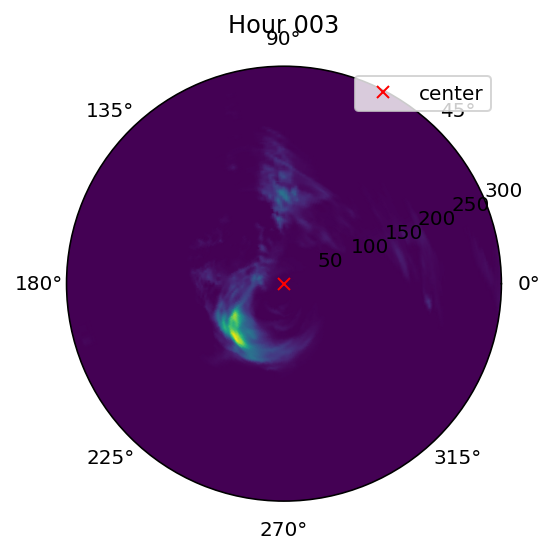

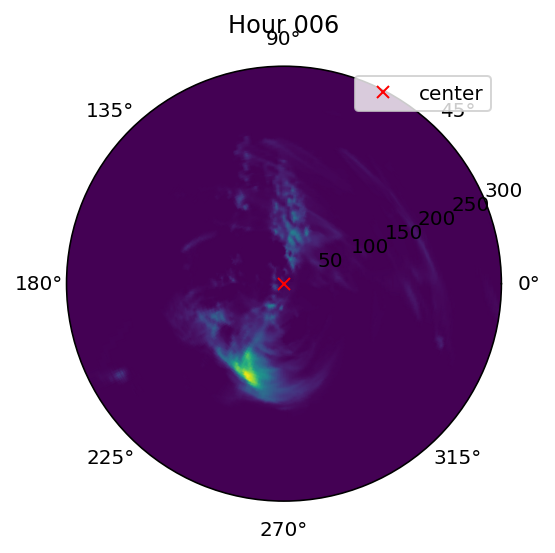

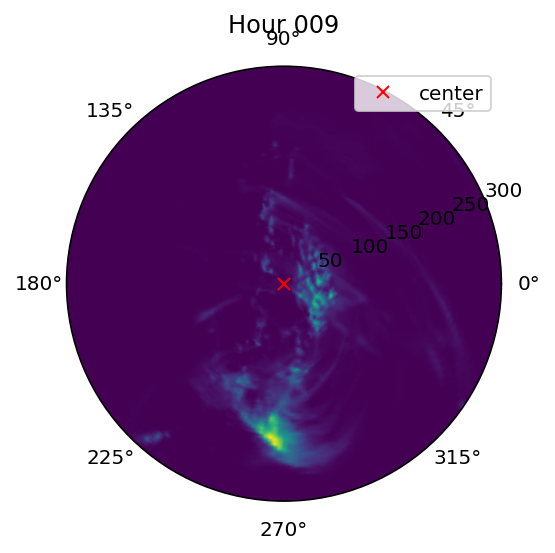

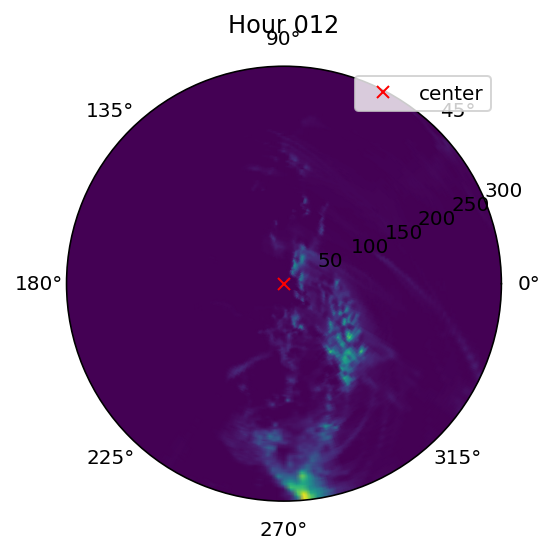

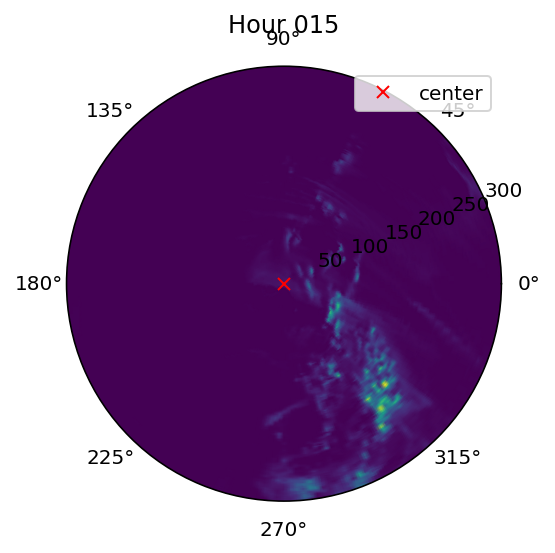

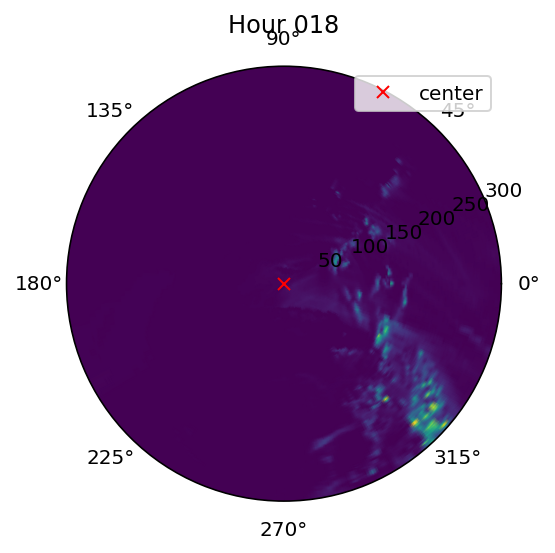

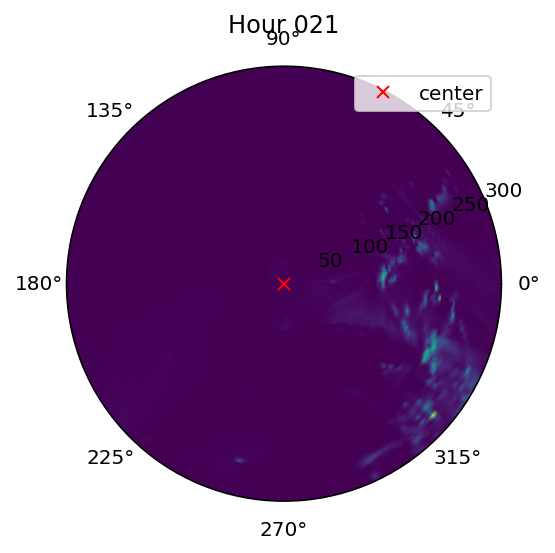

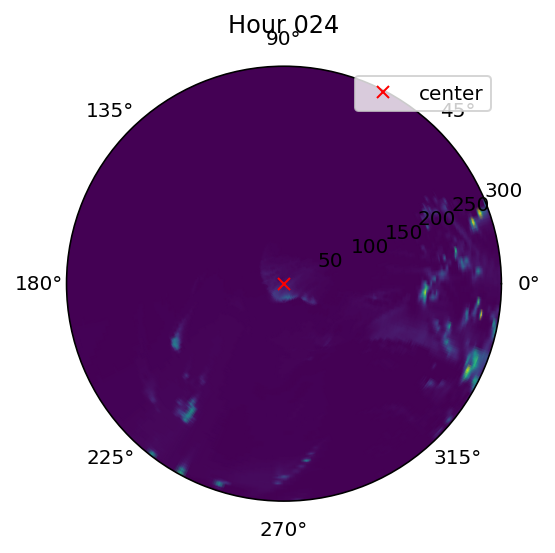

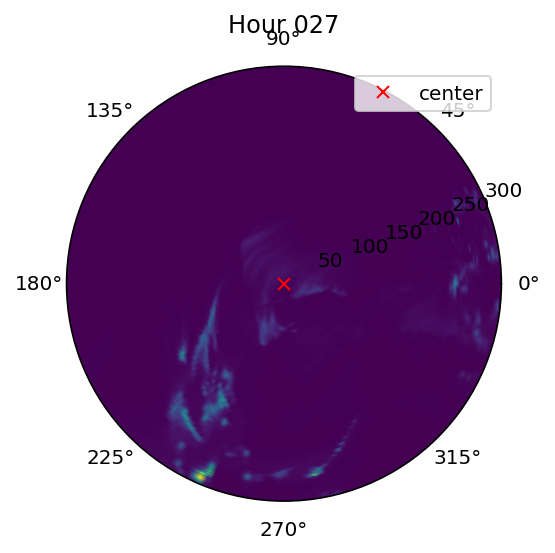

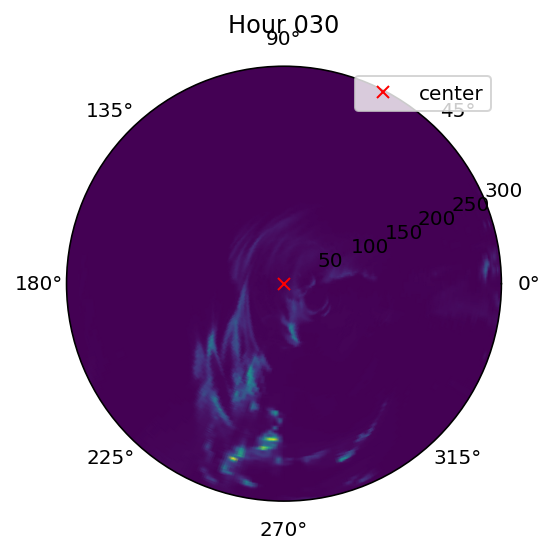

In [12]:
#loop over the datasets for each of the hours and plot 
from scipy.interpolate import NearestNDInterpolator

for i in range(0,33,3):
    #print('%03d' % i)
    hour = '%03d' % i
    dsi = xr.open_dataset('/data2/qy2216/HWRF_wind/hwrf.2021072718/nepartak11w/nc/nepartak11w.2021072718.f'+ hour+'.nc')
    #print(dsi)
    xcenteri = df[df.hour == i].lon.values[0]
    ycenteri = df[df.hour == i].lat.values[0]
    zi = dsi.APCP_surface.isel(time=0).values
    loni = dsi.longitude.values
    lati = dsi.latitude.values
    xi1 = (loni - xcenteri)*np.cos(np.deg2rad(ycenteri))*110.567
    yi1 = (lati - ycenteri)*110.567
    xi2,yi2 = np.meshgrid(xi1,yi1)
    # number of points X 2 matrix of x y
    xyi = np.stack((xi2.flatten(), yi2.flatten())).T

    interpi = NearestNDInterpolator(xyi, zi.flatten())
    Zi = interpi(polar_x2, polar_y2)

    plt.figure()
    #plt.pcolormesh(eval("x"+hour+"1"), eval("y"+hour+"1"), eval("z"+hour), shading='gouraud')
    #plt.plot(0, 0, 'rx', label='center')
    plt.subplot(projection="polar")
    plt.pcolormesh(theta1, r1, Zi, shading='gouraud')
    plt.plot(0, 0, 'rx', label='center')
    plt.title("Hour " + hour)
    plt.legend()
    
plt.gca().set_aspect('equal')
plt.show()

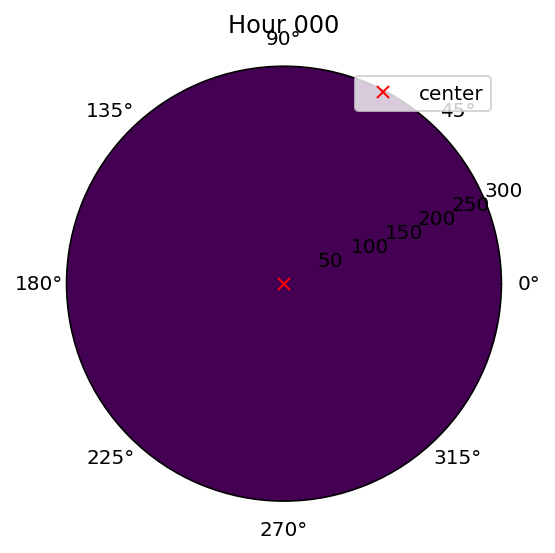

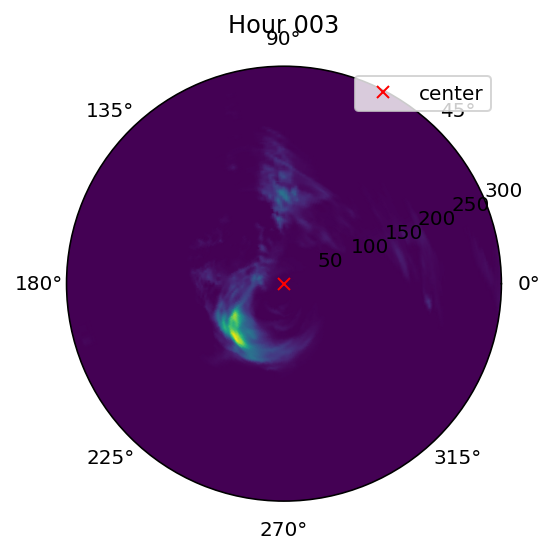

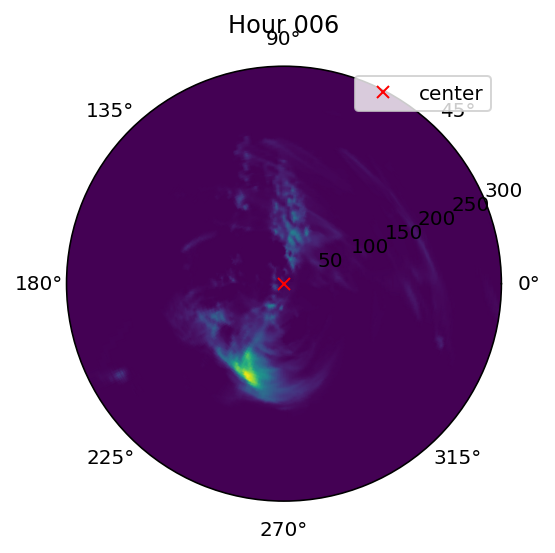

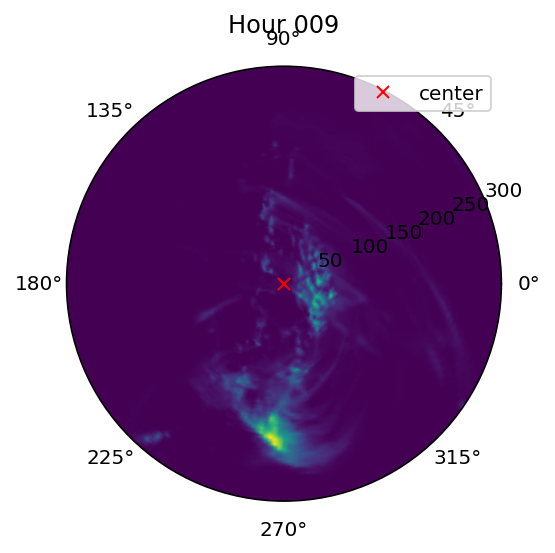

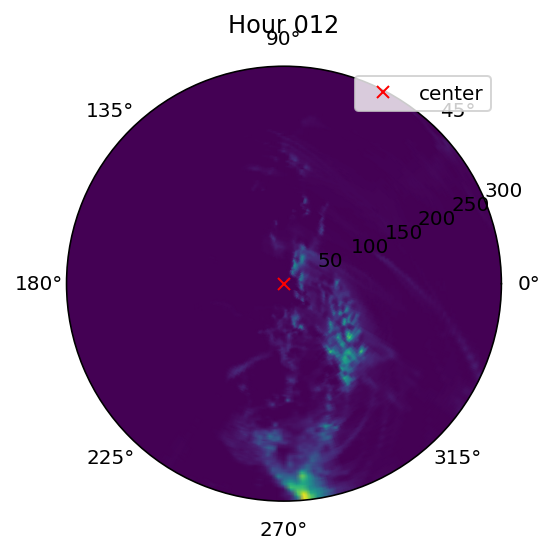

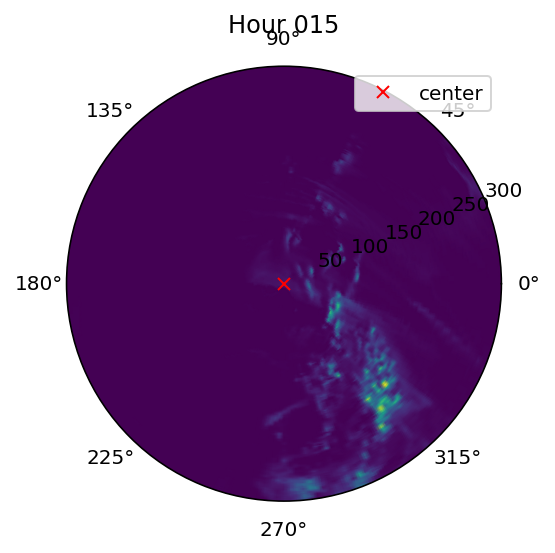

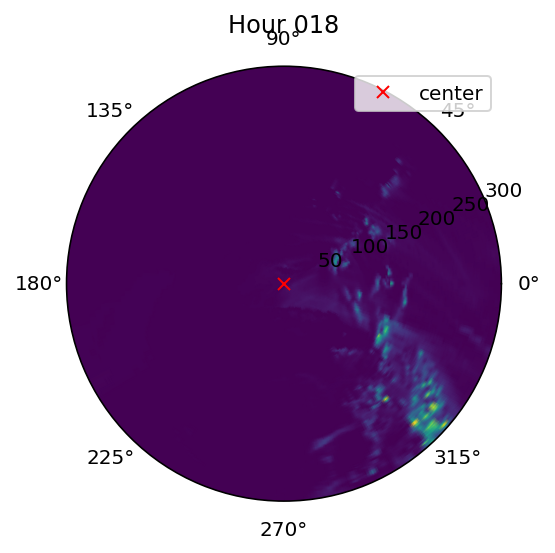

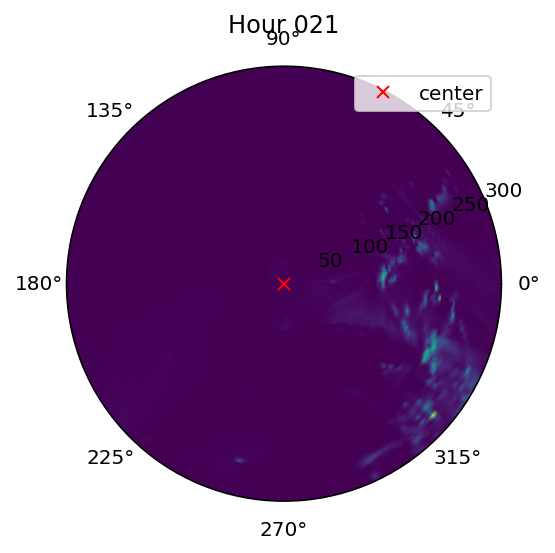

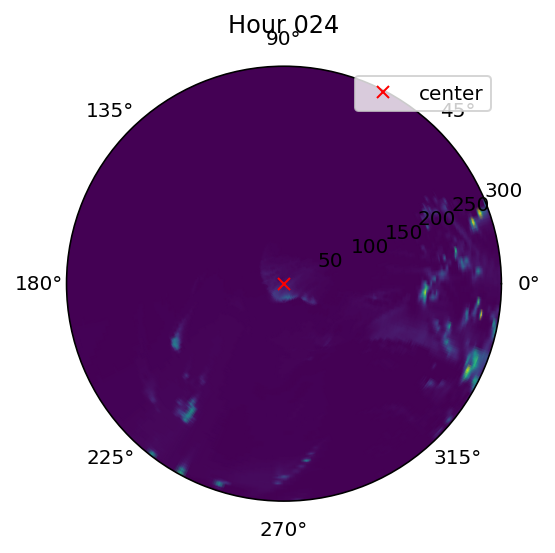

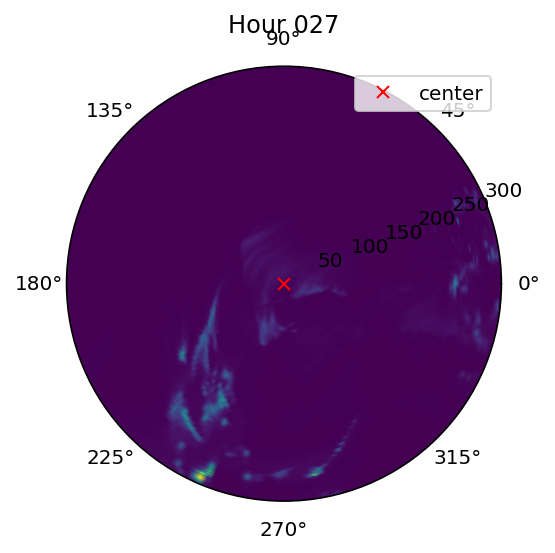

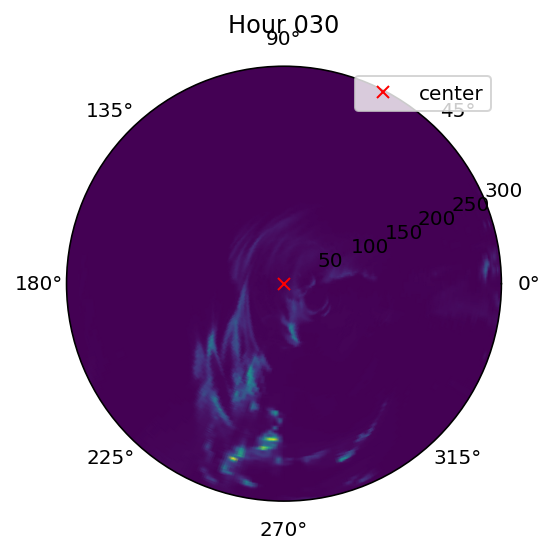

In [13]:
# loop over the datasets for each of the hours and plot 
# only if you'd like to reference the datasets outside the loop (locals() creates dict of vars)
from scipy.interpolate import NearestNDInterpolator

for i in range(0,33,3):
    #print('%03d' % i)
    hour = '%03d' % i
    locals()["ds"+hour] = xr.open_dataset('/data2/qy2216/HWRF_wind/hwrf.2021072718/nepartak11w/nc/nepartak11w.2021072718.f'+ hour+'.nc')
    locals()["xcenter"+hour] = df[df.hour == i].lon.values[0]
    locals()["ycenter"+hour] = df[df.hour == i].lat.values[0]
    locals()["z"+hour] = eval("ds" + hour + ".APCP_surface.isel(time=0).values")
    locals()["lon"+hour] = eval("ds" + hour + ".longitude.values")
    locals()["lat"+hour] = eval("ds" + hour + ".latitude.values")
    locals()["x"+hour+"1"] = (eval("ds" + hour + ".longitude.values") - eval("xcenter"+hour))*np.cos(np.deg2rad(eval("ycenter"+hour)))*110.567
    locals()["y"+hour+"1"] = (eval("ds" + hour + ".latitude.values") - eval("ycenter"+hour))*110.567
    locals()["x"+hour+"2"] = np.meshgrid(eval("x"+hour+"1"),eval("y"+hour+"1"))[0]
    locals()["y"+hour+"2"] = np.meshgrid(eval("x"+hour+"1"),eval("y"+hour+"1"))[1]
    # number of points X 2 matrix of x y
    locals()["xy"+hour] = np.stack((eval("x"+hour+"2").flatten(), eval("y"+hour+"2").flatten())).T
    
    locals()["interp"+hour] = NearestNDInterpolator(eval("xy"+hour), eval("z"+hour).flatten())
    locals()["Z"+hour] = eval("interp"+hour)(polar_x2, polar_y2)

    plt.figure()
    #plt.pcolormesh(eval("x"+hour+"1"), eval("y"+hour+"1"), eval("z"+hour), shading='gouraud')
    #plt.plot(0, 0, 'rx', label='center')
    plt.subplot(projection="polar")
    plt.pcolormesh(theta1, r1, eval("Z"+hour), shading='gouraud')
    plt.plot(0, 0, 'rx', label='center')
    plt.title("Hour " + hour)
    plt.legend()

plt.gca().set_aspect('equal')
plt.show()
    
    
#local_args = dict(locals())
#for name,val in locals().items():
    #print(name)

## Superimposed Plots

In [14]:
#find center of all hours, unsure if right but here we find mean of all centers for simplicity
sumx = 0
sumy = 0
numitems = 11

# method with locals()
#for name,val in locals().items():
#    if name[0:7] == "xcenter":
#        sumx = sumx + val
#    if name[0:7] == "ycenter":
#        sumy = sumy + val
        
for i in range(0,33,3):
    xcenteri = df[df.hour == i].lon.values[0]
    ycenteri = df[df.hour == i].lat.values[0]
    sumx = sumx + xcenteri
    sumy = sumy + ycenteri
        
#print(sumx)
#print(sumy)
meanx = sumx/numitems
meany = sumy/numitems
print(meanx)
print(meany)

139.73636363636362
40.336363636363636


In [15]:
#open all datasets as one using mfdataset

path = '/data2/qy2216/HWRF_wind/hwrf.2021072718/nepartak11w/nc/nepartak11w.2021072718.f'
numfiles = 11
files = [None]*(numfiles)
for i in range(0,33,3):
    hour = '%03d' % i
    files[i//3] = (path + hour + '.nc')
ds0 = xr.open_mfdataset(files)
np.nan_to_num(ds0.APCP_surface.isel(time=0).values)
#print(ds0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
#get data to graph
z0 = ds0.APCP_surface.isel(time=0).values

lon0 = ds0.longitude.values
lat0 = ds0.latitude.values

In [17]:
# convert units to km
x0 = (ds0.longitude.values - meanx) * np.cos(np.deg2rad(ycenter3)) * 110.567
y0 = (ds0.latitude.values - meany) * 110.567
x00, y00 = np.meshgrid(x0, y0)

# number of points X 2 matrix of x y
xy0 = np.stack((x00.flatten(), y00.flatten())).T

plt.pcolormesh(x0, y0, z0, shading='gouraud')
plt.plot(0, 0, 'rx', label='center')
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

#looks like this didn't really work

KeyboardInterrupt: 

In [ ]:
interp0 = NearestNDInterpolator(xy0, z0.flatten())
Z0 = interp0(polar_x2, polar_y2)

plt.subplot(projection="polar")
plt.pcolormesh(theta1, r1, Z0, shading='gouraud')
plt.plot(0, 0, 'rx', label='center')
plt.show()

### Brute Force Attempt

In [ ]:
#EXAMPLE -- SKIP
#Just working with hour3 to see if dict/plotting overlapping values works

lon3 = ds3.longitude.values
lat3 = ds3.latitude.values
for i in range(601):
    #print(i)
    for j in range(601):
        z = ds3.APCP_surface.isel(time=0,latitude=i,longitude=j).values
        lat = lat3[i]
        lon = lon3[j]
        if (lat,lon) not in rain.keys():
            rain[(lat,lon)] = z
        else:
            rain[(lat,lon)] += z
    #print(rain)

In [ ]:
#find cumulative precipitation at lat,lon coordinates over the 30 hours

#print((ds3.APCP_surface.latitude.values,ds3.APCP_surface.longitude.values))
#lon3 = ds3.longitude.values
#lat3 = ds3.latitude.values
# z = ds3.APCP_surface.isel(time=0,latitude=600,longitude=600).values
#print(z)

rain = {}
for t in range(0,33,3):
    hour = '%03d' % t
    lonvals = eval("ds"+hour).longitude.values
    latvals = eval("ds"+hour).latitude.values
    for i in range(601):
        #print(i)
        for j in range(601):
            z = eval("ds"+hour).APCP_surface.isel(time=0,latitude=i,longitude=j).values
            lat = latvals[i]
            lon = lonvals[j]
            if (lat,lon) not in rain.keys():
                rain[(lat,lon)] = z
            else:
                rain[(lat,lon)] += z
        #print(rain)


In [ ]:
#zi = dsi.APCP_surface.isel(time=0).values
#loni = dsi.longitude.values
#lati = dsi.latitude.values

maxlat = float('-inf')
minlat = float('inf')
maxlon = float('-inf')
minlon = float('inf')
latar = []
lonar = []

for k in rain.keys():
    # initial idea was to make an even grid to have data on
    # find max and min, in future can incorporate it into above 3 for loops so we do not have to iterate through keys
    #if k[0] > maxlat:
    #    maxlat = k[0]
    #if k[0] < minlat:
    #    minlat = k[0]
    #if k[1] > maxlon:
    #    maxlon = k[1]
    #if k[1] < minlon:
    #    minlon = k[1]
    #############################
    
    # make 2d array for data pts
    latar.append(k[0])
    lonar.append(k[1])

#remove duplicates
latarr = []
lonarr = []
[latarr.append(x) for x in latar if x not in latarr]
[lonarr.append(x) for x in lonar if x not in lonarr]

dataarr = np.zeros(len(latarr),len(lonarr))

for i in range(len(latarr)):
    for j in range(len(lonarr)):
        #dataarr.append([])
        # if key is in rain dictionary
        if (latarr[i], lonarr[j]) in rain.keys():
            dataarr[i][j] = rain[(latarr[i], lonarr[j])]
        #else: interpolate, 1-nn, or just keep as 0  

print(dataarr)

#make grid        
#latrange = np.linspace(maxlat-minlat,) #having trouble figuring out how many pts needed
#lonrange = np.linspace(maxlon-minlon,)

In [ ]:
#zi = dsi.APCP_surface.isel(time=0).values

x1s = (np.asarray(lonarr) - meanx)*np.cos(np.deg2rad(meany))*110.567
y1s = (np.asarray(latarr) - meany)*110.567
x2s,y2s = np.meshgrid(x1s,y1s)
# number of points X 2 matrix of x y
xys = np.stack((x2s.flatten(), y2s.flatten())).T

plt.pcolormesh(x1s, y1s, dataarr, shading='gouraud')
plt.plot(0, 0, 'rx', label='center')
plt.gca().set_aspect('equal')
plt.legend()
plt.title('Before we try Polar')
plt.show()


interps = NearestNDInterpolator(xys, dataarr.flatten())
Zs = interps(polar_x2, polar_y2)

plt.figure()
#plt.pcolormesh(eval("x"+hour+"1"), eval("y"+hour+"1"), eval("z"+hour), shading='gouraud')
#plt.plot(0, 0, 'rx', label='center')
plt.subplot(projection="polar")
plt.pcolormesh(theta1, r1, Zs, shading='gouraud')
plt.plot(0, 0, 'rx', label='center')
plt.title("Hour " + hour)
plt.legend()

plt.gca().set_aspect('equal')
plt.show()